# Classification. Choose tutors

1. [Загрузка данных](#load_data)
2. [EDA](#eda)
3. [Полезные функции](#useful_func)
4. [Подготовка данных](#data_preprocess)
5. [Базовая модель](#base_model)
6. [Случайный лес](#random_forest)
7. [Стохастический градиентный бустинг](#sgb)
8. [Итоговая модель](#final_model)
9. [Приложение](#supplement)

## 1. Загрузка данных <a class="anchor" id="load_data"></a>

Для начала добавим библиотеки необходимые для дальнейшего анализа, разрешенные правилами.

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим тренировочный датасет.

In [107]:
df = pd.read_csv('train.csv')
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


Задача заключается в предсказании вероятности того, что репетитор подойдет для подготовки к экзамену по математике. 

## 2. EDA <a class="anchor" id="eda"></a>

Проведем базовый первичный анализ признаков и целевой переменной.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [109]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [110]:
df['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

На основе представленных результатов можно сделать несколько выводов:
1. Датасет несбалансирован по значению целевой переменной;
2. В датасете отсутствуют пропуски;
3. Все признаки представлены числами, часть из них при этом являются дискретными, а другие непрерывными.

Рассмотрим дискретные признаки более пристально.

In [111]:
df['years_of_experience'].value_counts()

0.0    2774
1.0    1842
2.0    1743
3.0    1545
4.0    1177
5.0     581
6.0     234
7.0      73
8.0      22
9.0       9
Name: years_of_experience, dtype: int64

In [112]:
df['qualification'].value_counts()

1.0    4891
2.0    3033
3.0    2018
4.0      58
Name: qualification, dtype: int64

In [113]:
df['physics'].value_counts()

0.0    6294
1.0    3706
Name: physics, dtype: int64

In [114]:
df['chemistry'].value_counts()

0.0    8785
1.0    1215
Name: chemistry, dtype: int64

In [115]:
df['biology'].value_counts()

0.0    8828
1.0    1172
Name: biology, dtype: int64

In [116]:
df['english'].value_counts()

0.0    9409
1.0     591
Name: english, dtype: int64

In [117]:
df['history'].value_counts()

0.0    9820
1.0     180
Name: history, dtype: int64

In [118]:
df['geography'].value_counts()

0.0    9723
1.0     277
Name: geography, dtype: int64

Рассчитаем для каждого из этих признаков показатель взаимной информации с целевой переменной, чтобы получить базовое представление об их пользе при построении модели предсказания. Для этого реализуем функцию, отвечающую за расчет данной величины.

In [119]:
def mut_info(x, y):
    mut_info = 0
    unique_x = x.unique()
    unique_y = y.unique()
    size = x.shape[0]
    
    for y_val in unique_y:
        for x_val in unique_x:
            p_x = np.sum(x == x_val)/size
            p_y = np.sum(y == y_val)/size
            p_x_y = np.sum((x == x_val) & (y == y_val))/size
            
            if p_x_y != 0:
                mut_info += p_x_y * np.log(p_x_y / (p_x * p_y))
    
    return mut_info

In [120]:
features = ['years_of_experience', 'qualification', 'physics', 'chemistry', 'biology', 
            'english', 'history', 'geography']
target = 'choose'

for feature in features:
    print(f'Взаимная информация признака {feature} с целевой переменной: {mut_info(df[feature], df[target]):.6f}.')

Взаимная информация признака years_of_experience с целевой переменной: 0.001150.
Взаимная информация признака qualification с целевой переменной: 0.001367.
Взаимная информация признака physics с целевой переменной: 0.018311.
Взаимная информация признака chemistry с целевой переменной: 0.003671.
Взаимная информация признака biology с целевой переменной: 0.002264.
Взаимная информация признака english с целевой переменной: 0.000232.
Взаимная информация признака history с целевой переменной: 0.000011.
Взаимная информация признака geography с целевой переменной: 0.000020.


Из полученных результатов следует, что наиболее полезными дискретными признаками являются `physics`, `chemistry` и `biology`. В свою очередь `history` и `geography` скорее всего будут бесполезны при предсказании искомой вероятности.

Изучим также числовые признаки, которые представлены непрерывными значениями - `Id`, `age`, `lesson_price` и `mean_exam_points`. Признак `Id` очевидно не несет никакой смысловой нагрузки и отображает номер наблюдения в датасете. Проанализируем остальные.

In [121]:
target = df['choose']

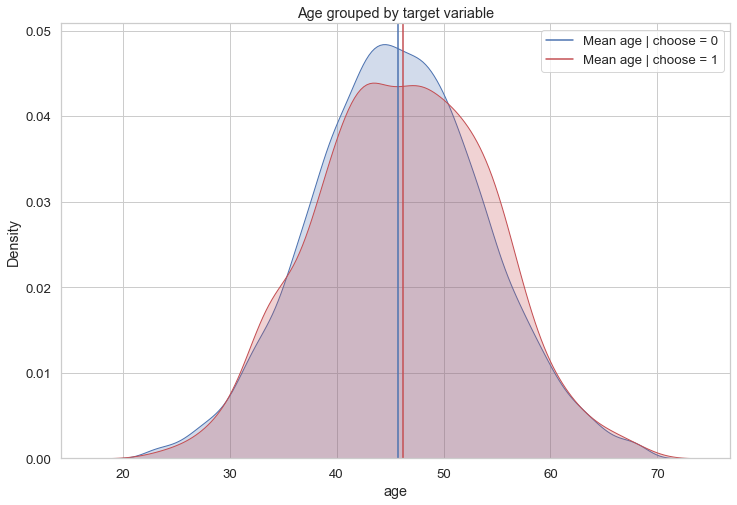

In [122]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2, style='whitegrid')
plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(df.loc[target == 0, 'age'], shade=True)
plt.axvline(df.loc[target == 0, 'age'].mean(), color='b', 
            label='Mean age | choose = 0')
sns.kdeplot(df.loc[target == 1, 'age'], shade=True, color='r')
plt.axvline(df.loc[target == 1, 'age'].mean(), color='r', 
            label='Mean age | choose = 1')
plt.title('Age grouped by target variable')
plt.legend()
plt.show()

Как видим распределения признака `age` и средние значения для разных классов целевой переменной довольно близки, что скорее указывает на незначительную роль этого признака в классификации.

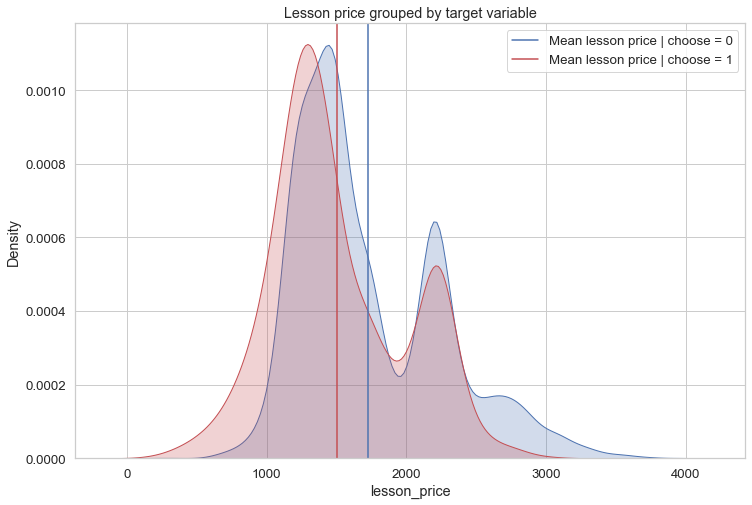

In [123]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2, style='whitegrid')
plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(df.loc[target == 0, 'lesson_price'], shade=True)
plt.axvline(df.loc[target == 0, 'lesson_price'].mean(), color='b', 
            label='Mean lesson price | choose = 0')
sns.kdeplot(df.loc[target == 1, 'lesson_price'], shade=True, color='r')
plt.axvline(df.loc[target == 1, 'lesson_price'].mean(), color='r', 
            label='Mean lesson price | choose = 1')
plt.title('Lesson price grouped by target variable')
plt.legend()
plt.show()

Для данного признака формы распределений для разных классов целевой переменной в определенной степени похожи, в обоих случаях отчетливо видны две моды. Однако средние значения заметно различаются. Это может указывать на важность признака `lesson_price` для предсказания вероятности того, что репетитор подойдет для подготовки к экзамену по математике.

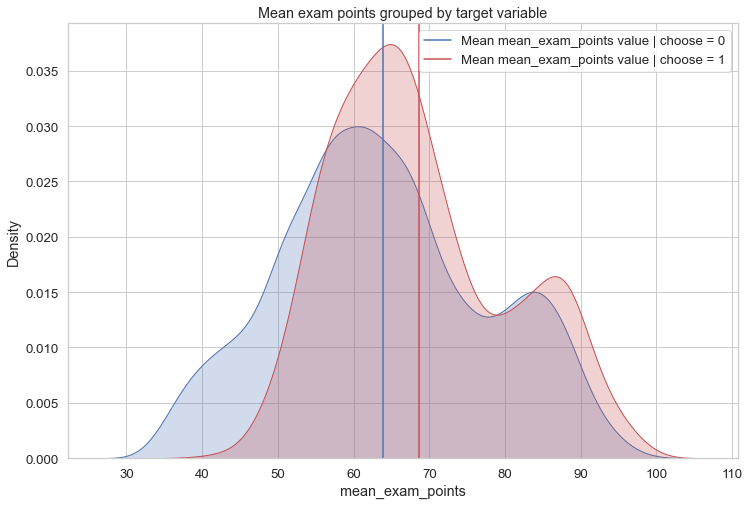

In [124]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2, style='whitegrid')
plt.ticklabel_format(style='plain', axis='x')
sns.kdeplot(df.loc[target == 0, 'mean_exam_points'], shade=True)
plt.axvline(df.loc[target == 0, 'mean_exam_points'].mean(), color='b', 
            label='Mean mean_exam_points value | choose = 0')
sns.kdeplot(df.loc[target == 1, 'mean_exam_points'], shade=True, color='r')
plt.axvline(df.loc[target == 1, 'mean_exam_points'].mean(), color='r', 
            label='Mean mean_exam_points value | choose = 1')
plt.title('Mean exam points grouped by target variable')
plt.legend()
plt.show()

Данный график указывает на важность признака `mean_exam_points` для разделения целевой переменной.

## 3. Полезные функции <a class="anchor" id="useful_func"></a>

Прежде всего реализуем ряд функций, которые будут полезны при дальнейшей работе.

In [125]:
# Стандартизация данных
def standard_scale(X_train, X_test, feature):
    mean_value = np.mean(X_train[feature])
    std_value = np.std(X_train[feature])
    X_train.loc[:, feature] = (X_train[feature] - mean_value) / std_value
    X_test.loc[:, feature] = (X_test[feature] - mean_value) / std_value
    
# Нормализация данных 
def norm_scale(X_train, X_test, feature):
    min_value = np.min(X_train[feature])
    max_value = np.max(X_train[feature])
    X_train.loc[:, feature] = (X_train[feature] - min_value) / (max_value - min_value)
    X_test.loc[:, feature] = (X_test[feature] - min_value) / (max_value - min_value)

Наш датасет несбалансирован, поэтому `accuracy` будет не очень показательна в данной задаче. В качестве метрики, которая используется для оценки качества модели в соревновании задана площадь под кривой ошибок. Реализуем расчет данного показателя, для сравнения моделей.

In [126]:
def recall(y_true, y_pred, class_value=1):
    tp = np.sum((y_true == y_pred) & (y_true == class_value))
    recall = tp/np.sum(y_true == class_value)
    return recall

def fpr(y_true, y_pred, class_value=1):
    fp = np.sum((y_pred == class_value) & (y_true != class_value))
    fpr = fp/np.sum(y_true != class_value)
    return fpr

def roc_auc(y_test, test_answers_prob):
    unique_pr = sorted(np.unique(test_answers_prob), reverse=True)
    TPR = []
    FPR = []

    for prob in unique_pr:
        y_pred = test_answers_prob
        y_pred[y_pred > prob] = 1
        TPR.append(recall(y_test, y_pred))
        FPR.append(fpr(y_test, y_pred))

    TPR.append(1)
    FPR.append(1)
    
    return np.trapz(TPR, x = FPR)

## 4. Подготовка данных <a class="anchor" id="data_preprocess"></a>

Выделим целевую переменную из тренировочного датасета.

In [127]:
y = df['choose']
X = df.drop(columns=['choose'])
X.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0


Разделим датасет на обучающую и валидационную выборки.

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
9254,9254,50.0,0.0,1700.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,61.0
1561,1561,42.0,5.0,1750.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,68.0
1670,1670,44.0,4.0,1300.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,56.0
6087,6087,40.0,2.0,1450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
6669,6669,59.0,8.0,2150.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0


## 5. Базовая модель <a class="anchor" id="base_model"></a>

Перейдем к построению базовой модели. В качестве такой возьмем логистическую регрессию. Реализуем функции, которые будут необходимы при обучении и предсказании.

In [129]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Расчет ошибки
def calc_logloss(y, y_pred, delta=1e-16):
    y_pred[y_pred == 0] = delta
    y_pred[y_pred == 1] = 1 - delta
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

# Градиентный спуск
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
    return W

# Расчет вероятностей
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

Проведем стандартизацию данных, потому что данная модель базируется на градиентном спуске и чувствительна к размерностям признаков. После этого преобразуем данные в numpy массивы, для удобства работы.

In [130]:
Z_train = X_train.copy()
Z_test = X_test.copy()

for column in Z_train.columns:
    standard_scale(Z_train, Z_test, column)
    
Z_train = Z_train.to_numpy()
Z_test = Z_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Теперь обучим модель, сделаем предсказания и посчитаем значения метрик.

In [131]:
W = eval_model(Z_train, y_train, iterations=1000, eta=1e-1)
y_train_pred_proba = calc_pred_proba(W, Z_train)
y_test_pred_proba = calc_pred_proba(W, Z_test)
print(f'Train - {roc_auc(y_train, y_train_pred_proba):6f}.')
print(f'Test - {roc_auc(y_test, y_test_pred_proba):6f}.')

Train - 0.848564.
Test - 0.849514.


Попробуем посчитать модель, удалив ряд признаков, которые мы классифицировали ранее как малополезные.

In [132]:
Z_train = X_train.copy()
Z_test = X_test.copy()

Z_train.drop(columns=['Id', 'age', 'history', 'geography'], inplace=True)
Z_test.drop(columns=['Id', 'age', 'history', 'geography'], inplace=True)

for column in Z_train.columns:
    standard_scale(Z_train, Z_test, column)
    
Z_train = Z_train.to_numpy()
Z_test = Z_test.to_numpy()

W = eval_model(Z_train, y_train, iterations=1000, eta=1e-1)
y_train_pred_proba = calc_pred_proba(W, Z_train)
y_test_pred_proba = calc_pred_proba(W, Z_test)
print(f'Train - {roc_auc(y_train, y_train_pred_proba):6f}.')
print(f'Test - {roc_auc(y_test, y_test_pred_proba):6f}.')

Train - 0.848548.
Test - 0.850065.


Как видим значения метрик несколько улучшились.

## 6. Случайный лес <a class="anchor" id="random_forest"></a>

Попробуем применить алгоритм бэггинга к данной задаче и построить случайный лес. Реализуем необходимые классы и функции для построения одного дерева.

In [133]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity


# Расчет прироста

def gain(left_labels, right_labels, root_gini):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [134]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] # размер совпадает с исходной выборкой
    bootstrap = []
    
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        b_data = data[sample_index]
        b_labels = labels[sample_index]
        
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

def get_subsample(len_sample):
    
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.sqrt(len_sample))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [135]:
# Реализуем класс узла дерева

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
        
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels, positive_class=1):
        self.data = data
        self.labels = labels
        self.positive_class = positive_class
        self.prediction = self.predict_proba()
        
    def predict_proba(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # так как пользуемся метрикой ROC_AUC, то возвращаем не метку класса, а вероятность принадлежности классу
        
        return classes.get(self.positive_class, 0) / sum(classes.values())

Запишем функции, которые будут отвечать за формирование разбиений в дереве.

In [136]:
# Разбиение датасета в узле

def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels


# Нахождение наилучшего разбиения

def find_best_split(data, labels, min_samples_leaf):
    
    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    feature_subsample_indices = get_subsample(data.shape[1])  # выбираем случайные признаки    
    
    for index in feature_subsample_indices:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее заданного количества объектов
            if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                continue
            
            current_gain = gain(true_labels, false_labels, root_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index


# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth=100, min_samples_leaf=5):

    gain, t, index = find_best_split(data, labels, min_samples_leaf)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качестве, или же мы достигли максимальной глубины
    if (gain == 0) or (max_depth == 0):
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева, уменьшаем параметр max_depth на 1
    true_branch = build_tree(true_data, true_labels, max_depth-1, min_samples_leaf)
    false_branch = build_tree(false_data, false_labels, max_depth-1, min_samples_leaf)
    
    
    # Возвращаем класс узла со всеми поддеревьями
    return Node(index, t, true_branch, false_branch)


def get_probability(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        return node.prediction

    if obj[node.index] <= node.t:
        return get_probability(obj, node.true_branch)
    else:
        return get_probability(obj, node.false_branch)
    
def predict_proba(data, tree):
    
    probabilities = []
    for obj in data:
        prob = get_probability(obj, tree)
        probabilities.append(prob)
    return probabilities

Реализуем функции, отвечающие за формирование случайного леса из деревьев.

In [137]:
# Формирование случайного леса

def random_forest(data, labels, n_trees, max_depth=15, min_samples_leaf=5):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels, max_depth, min_samples_leaf))
        
    return forest

# предсказание голосованием деревьев

def tree_vote_proba(data, forest):
    # добавим предсказания всех деревьев в список
    probabilities = []
    for tree in forest:
        probabilities.append(predict_proba(data, tree))

    # сформируем список с предсказаниями для каждого объекта
    probabilities_per_object = list(zip(*probabilities))

    # выберем в качестве итогового предсказания среднюю вероятность
    avg_probabilities = []
    for obj in probabilities_per_object:
        avg_probabilities.append(np.average(obj))

    return avg_probabilities

Обучим модель с разными гиперпараметрами и рассчитаем метрики.

In [525]:
min_leafs_list = [3, 5, 7]
max_depth_list = [5, 10, 100, 250]
n_trees = [50, 75, 150]

for n in n_trees:
    for depth in max_depth_list:
        for leaf in min_leafs_list:
            forest = random_forest(Z_train, y_train, n_trees=n, min_samples_leaf=leaf, max_depth=depth)
            train_answers_forest_pr = tree_vote_proba(Z_train, forest)
            test_answers_forest_pr = tree_vote_proba(Z_test, forest)
            print(f'min_samples_leaf = {leaf}, max_depth = {depth}, n_trees = {n}: train - '
                  f'{roc_auc(y_train, np.array(train_answers_forest_pr))}; test - '
                 f'{roc_auc(y_test, np.array(test_answers_forest_pr))}')

min_samples_leaf = 3, max_depth = 5, n_trees = 50: train - 0.8196161391120955; test - 0.8040026514499231
min_samples_leaf = 5, max_depth = 5, n_trees = 50: train - 0.8177881185854112; test - 0.7995819956170872
min_samples_leaf = 7, max_depth = 5, n_trees = 50: train - 0.8133694667507515; test - 0.8039035759189845
min_samples_leaf = 3, max_depth = 10, n_trees = 50: train - 0.8859750692019612; test - 0.8266520255048724
min_samples_leaf = 5, max_depth = 10, n_trees = 50: train - 0.8782284556396691; test - 0.8258676775516077
min_samples_leaf = 7, max_depth = 10, n_trees = 50: train - 0.8716049201237493; test - 0.8270400713343824
min_samples_leaf = 3, max_depth = 100, n_trees = 50: train - 0.9171380013749932; test - 0.8258912669637359
min_samples_leaf = 5, max_depth = 100, n_trees = 50: train - 0.899183290860172; test - 0.8273066316914316
min_samples_leaf = 7, max_depth = 100, n_trees = 50: train - 0.8970941476205123; test - 0.8316753908175853
min_samples_leaf = 3, max_depth = 250, n_trees 

Заметим, что так как в данном случае мы работаем с деревьями, то размерность признаков не так важна, а значит можно не проводить процедуру масштабирования перед обучением модели.

In [34]:
XX_train = X_train.to_numpy()
XX_test = X_test.to_numpy()


forest = random_forest(XX_train, y_train, n_trees=100, min_samples_leaf=1, max_depth=100)
train_answers_forest_pr = tree_vote_proba(XX_train, forest)
test_answers_forest_pr = tree_vote_proba(XX_test, forest)
print(f'Train - {roc_auc(y_train, np.array(train_answers_forest_pr))}.')
print(f'Test - {roc_auc(y_test, np.array(test_answers_forest_pr))}.')

Train - 0.99987206360119.
Test - 0.8150495731495876.


Как видим из предыдущих примеров модель легко переобучается, однако ограничение глубины деревьев и особенно количества объектов в листе, позволяет уменьшить величину переобучения.

In [35]:
forest = random_forest(XX_train, y_train, n_trees=75, min_samples_leaf=21, max_depth=10)
train_answers_forest_pr = tree_vote_proba(XX_train, forest)
test_answers_forest_pr = tree_vote_proba(XX_test, forest)
print(f'Train - {roc_auc(y_train, np.array(train_answers_forest_pr))}.')
print(f'Test - {roc_auc(y_test, np.array(test_answers_forest_pr))}.')

Train - 0.8828192239300512.
Test - 0.8218079397243342.


In [33]:
forest = random_forest(Z_train, y_train, n_trees=75, min_samples_leaf=21, max_depth=10)
train_answers_forest_pr = tree_vote_proba(Z_train, forest)
test_answers_forest_pr = tree_vote_proba(Z_test, forest)
print(f'Train - {roc_auc(y_train, np.array(train_answers_forest_pr))}.')
print(f'Test - {roc_auc(y_test, np.array(test_answers_forest_pr))}.')

Train - 0.8593581598868991.
Test - 0.8281664657635067.


Тем не менее улучшения оценок по сравнению с моделью логистической регрессии добиться не получается. Попробуем реализовать стохастический бустинг и проанализировать результаты.

## 7. Стохастический градиентный бустинг <a class="anchor" id="sgb"></a>

Реализуем функции необходимые для обучения модели и построения предсказаний. Для начала модифицируем ряд функций, связанных с построением дерева, так чтобы их можно было использовать в стохастическом бустинге. Например, в качестве значения листа будет возвращать гамму, которая рассчитывается на основе предыдущих вероятностей объектов (которые с этой целью тоже нужно будет хранить в листе).

In [138]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле



# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, values, probs):
        self.data = data
        self.values = values
        self.probs = probs
        self.prediction = self.predict()
        
    def predict(self):
        # Рассчитываем гамму
        return np.sum(self.values) / np.sum([p*(1-p) for p in self.probs])


# Расчет прироста

def gain(left_values, right_values, root_var):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_values.shape[0]) / (left_values.shape[0] + right_values.shape[0])
    
    return root_var - p * np.var(left_values) - (1 - p) * np.var(right_values)


# Разбиение датасета в узле

def split(data, values, probs, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_values = values[left]
    false_values = values[right]
    
    true_probs = probs[left]
    false_probs = probs[right]
        
    return true_data, false_data, true_values, false_values, true_probs, false_probs



# Нахождение наилучшего разбиения

def find_best_split(data, values, probs, min_samples_leaf):

    # В начальном узле, который будем делить, считаем дисперсию
    root_var = np.var(values)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_values, false_values, true_probs, false_probs = split(data, values, probs, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                continue
            
            current_gain = gain(true_values, false_values, root_var)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index



# Построение дерева с помощью рекурсивной функции

def build_tree(data, values, probs, max_depth=3, min_samples_leaf=5):

    gain, t, index = find_best_split(data, values, probs, min_samples_leaf)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if (gain == 0) or (max_depth == 0):
        return Leaf(data, values, probs)

    true_data, false_data, true_values, false_values, true_probs, false_probs = split(data, values, probs, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_values, true_probs, max_depth-1, min_samples_leaf)
    false_branch = build_tree(false_data, false_values, false_probs, max_depth-1, min_samples_leaf)
    
    
    # Возвращаем класс узла со всеми поддеревьями
    return Node(index, t, true_branch, false_branch)

def predict_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        return node.prediction

    if obj[node.index] <= node.t:
        return predict_object(obj, node.true_branch)
    else:
        return predict_object(obj, node.false_branch)
    
def predict(data, tree):
    
    predictions = []
    for obj in data:
        prediction = predict_object(obj, tree)
        predictions.append(prediction)
    return predictions

Функция для расчета остатков стандартная.

In [139]:
def residual(y, z):
    return y - z

Реализуем функции для обучения и предсказания. Отметим, что значения, которые выдает функцию `gb_predict` являются lod_odds, то есть для получения конечных вероятностей их 

In [140]:
def gb_fit_stochastic(n_trees, max_depth, X_train, y_train, eta, min_samples_leaf=5, positive_class=1,
                      subsample=0.5):
    
    # Деревья будем записывать в список
    trees = []
    
    n_observations = X_train.shape[0]
    
    for i in range(n_trees):
        
        # Выбираем случайную подвыборку для обучения
        sample_index = np.random.choice(np.arange(n_observations), size=int(round(n_observations*subsample, 0)),
                                        replace=False)

#         target = gb_predict(X_train, y_train, trees, eta, positive_class)
#         probs = np.exp(target) / (1 + np.exp(target))
        probs = gb_predict(X_train, y_train, trees, eta, positive_class)
        tree = build_tree(X_train[sample_index], residual(y_train[sample_index], probs[sample_index]), 
                          probs[sample_index], max_depth, min_samples_leaf)
        

        trees.append(tree)
        
    return trees

In [141]:
def gb_predict(X, y, trees_list, eta, positive_class=1):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться log_odds для обучающей выборки
    
    initial_prediction = np.array([np.log(y[y == positive_class].shape[0] / 
                                          y[y != positive_class].shape[0])] * X.shape[0])

    if trees_list:
        predictions = initial_prediction + sum([eta * np.array(predict(X, alg)) for alg in trees_list])
    else:
        predictions = initial_prediction

    probs = np.exp(predictions) / (1 + np.exp(predictions))
        
    return probs

In [59]:
n_trees = [30, 50, 75]
max_depth = [3, 5]
eta = [0.05, 0.1, 0.15]
leafs = [5, 7]

for n in n_trees:
    for depth in max_depth:
        for lr in eta:
            for leaf in leafs:
                hand_model_stochastic = gb_fit_stochastic(n_trees=n, max_depth=depth, 
                                                          X_train=Z_train, y_train=y_train, eta=lr, 
                                                          min_samples_leaf=leaf)
                probs_train = gb_predict(Z_train, y_train, hand_model_stochastic, eta=lr)
    #             probs_train = np.exp(target_train) / (1 + np.exp(target_train))
                probs_test = gb_predict(Z_test, y_train, hand_model_stochastic, eta=lr)
    #             probs_test = np.exp(target_test) / (1 + np.exp(target_test))
                print(f'n_trees = {n}, max_depth = {depth}, eta = {lr}, min_samples_leaf = {leaf} : '
                      f'train - {roc_auc(y_train, probs_train):6f}, test - {roc_auc(y_test, probs_test):6f}')

n_trees = 30, max_depth = 3, eta = 0.05, min_samples_leaf = 5 : train - 0.823489, test - 0.810264
n_trees = 30, max_depth = 3, eta = 0.05, min_samples_leaf = 7 : train - 0.823087, test - 0.818362
n_trees = 30, max_depth = 3, eta = 0.1, min_samples_leaf = 5 : train - 0.847592, test - 0.837475
n_trees = 30, max_depth = 3, eta = 0.1, min_samples_leaf = 7 : train - 0.848535, test - 0.838394
n_trees = 30, max_depth = 3, eta = 0.15, min_samples_leaf = 5 : train - 0.858895, test - 0.845711
n_trees = 30, max_depth = 3, eta = 0.15, min_samples_leaf = 7 : train - 0.860001, test - 0.848649
n_trees = 30, max_depth = 5, eta = 0.05, min_samples_leaf = 5 : train - 0.862518, test - 0.833899
n_trees = 30, max_depth = 5, eta = 0.05, min_samples_leaf = 7 : train - 0.858835, test - 0.836103
n_trees = 30, max_depth = 5, eta = 0.1, min_samples_leaf = 5 : train - 0.877200, test - 0.841951
n_trees = 30, max_depth = 5, eta = 0.1, min_samples_leaf = 7 : train - 0.875054, test - 0.847710
n_trees = 30, max_depth 

Рассчитаем результаты для нестандартизованной выборки для сравнения.

In [142]:
hand_model_stochastic = gb_fit_stochastic(n_trees=50, max_depth=3, 
                                                          X_train=XX_train, y_train=y_train, eta=0.1, 
                                                          min_samples_leaf=5)
probs_train = gb_predict(XX_train, y_train, hand_model_stochastic, eta=lr)
probs_test = gb_predict(XX_test, y_train, hand_model_stochastic, eta=lr)
print(f'train - {roc_auc(y_train, probs_train):6f}, test - {roc_auc(y_test, probs_test):6f}')

train - 0.861675, test - 0.849857


Как видим при определенных гиперпараметрах удается несколько улучшить результаты, полученные для модели логистической регрессии.

## 8. Итоговая модель <a class="anchor" id="final_model"></a>

Рассчитаем итоговую модель на основе стохастического градиентного бустинга и сделаем предсказания. Удалим еще признак `english`, так как его показатель взаимной информации с целевой переменной был также довольно маленьким.

In [168]:
ZZ_train = X_train.copy()
ZZ_test = X_test.copy()

ZZ_train.drop(columns=['Id', 'age', 'history', 'geography', 'english'], inplace=True)
ZZ_test.drop(columns=['Id', 'age', 'history', 'geography', 'english'], inplace=True)
    
ZZ_train = ZZ_train.to_numpy()
ZZ_test = ZZ_test.to_numpy()

In [173]:
model_final = gb_fit_stochastic(n_trees=50, max_depth=3, X_train=ZZ_train, y_train=y_train, eta=0.1, 
                                min_samples_leaf=5)
probs_train = gb_predict(ZZ_train, y_train, model_final, eta=0.1)
probs_test = gb_predict(ZZ_test, y_train, model_final, eta=0.1)
print(f'train - {roc_auc(y_train, probs_train):6f}, test - {roc_auc(y_test, probs_test):6f}')

train - 0.861107, test - 0.852120


In [174]:
df_test = pd.read_csv('test.csv')
df_test.drop(columns=['Id', 'age', 'history', 'geography', 'english'], inplace=True)
    
TEST = df_test.to_numpy()
TEST[:5]

array([[2.00e+00, 2.70e+03, 3.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        9.00e+01],
       [6.00e+00, 1.80e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        7.10e+01],
       [2.00e+00, 1.20e+03, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        4.50e+01],
       [4.00e+00, 2.95e+03, 3.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        9.20e+01],
       [3.00e+00, 1.40e+03, 2.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        5.80e+01]])

In [175]:
submit_answers_proba = gb_predict(TEST, y_train, model_final, eta=0.1)
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['choose'] = submit_answers_proba
sample_submission.to_csv('submit.csv', index=False)

## Приложение <a class="anchor" id="supplement"></a>

### AdaBoost <a class="anchor" id="ada"></a>

Дополнительно попробовал реализовать модель AdaBoost, но не получилось улучшить результаты стохастического градиентного бустинга. Возможно есть ошибка при расчете вероятностей.

In [184]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels, weights, positive_class=1):
        self.data = data
        self.labels = labels
        self.weights = weights
        self.positive_class = positive_class
        self.prediction = self.predict()
        self.pred_proba = self.predict_proba()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for i in range(len(self.labels)):
            if self.labels[i] not in classes:
                classes[self.labels[i]] = 0
            classes[self.labels[i]] += self.weights[i]
            
        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction
    
    def predict_proba(self):
        
        classes = {}
        for i in range(len(self.labels)):
            if self.labels[i] not in classes:
                classes[self.labels[i]] = 0
            classes[self.labels[i]] += self.weights[i]
            
        return classes.get(self.positive_class, 0) / sum(classes.values())


    
def weighted_gini(labels, weights):
    #  подсчет количества объектов разных классов
    classes = {}
    for i in range(len(labels)):
        if labels[i] not in classes:
            classes[labels[i]] = 0
        classes[labels[i]] += weights[i]
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / sum(classes.values())
        impurity -= p ** 2
        
    return impurity


# Расчет прироста

def gain(left_labels, right_labels, left_weights, right_weights, root_gini):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * weighted_gini(left_labels, left_weights) - (1 - p) * weighted_gini(right_labels, right_weights)

# Разбиение датасета в узле

def split(data, labels, weights, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
    
    true_weights = weights[left]
    false_weights = weights[right]
        
    return true_data, false_data, true_labels, false_labels, true_weights, false_weights


# Нахождение наилучшего разбиения

def find_best_split(data, labels, weights):
    
    root_gini = weighted_gini(labels, weights)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels, true_weights, false_weights = split(data, labels, weights, index, t)
            
            current_gain = gain(true_labels, false_labels, true_weights, false_weights, root_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, weights, max_depth=1):

    gain, t, index = find_best_split(data, labels, weights)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качестве, или же мы достигли максимальной глубины
    if (gain == 0) or (max_depth == 0):
        return Leaf(data, labels, weights)

    true_data, false_data, true_labels, false_labels, true_weights, false_weights = split(data, labels, weights, index, t)

    # Рекурсивно строим два поддерева, уменьшаем параметр max_depth на 1
    true_branch = build_tree(true_data, true_labels, true_weights, max_depth-1)
    false_branch = build_tree(false_data, false_labels, false_weights, max_depth-1)
    
    
    # Возвращаем класс узла со всеми поддеревьями
    return Node(index, t, true_branch, false_branch)


def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        return node.prediction

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)
    
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

def get_proba_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        return node.pred_proba

    if obj[node.index] <= node.t:
        return get_proba_object(obj, node.true_branch)
    else:
        return get_proba_object(obj, node.false_branch)


def predict_proba(data, tree):
    
    probas = []
    for obj in data:
        prob = get_proba_object(obj, tree)
        probas.append(prob)
    return probas

def amount_of_say(x):
    return 1/2 * np.log((1 - x) / x)

def ab_predict(X, trees, alphas):
    
    predictions = []
    for tree in trees:
        predictions.append(predict(X, tree))

    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
        
    final_predictions = []
    for obj in predictions_per_object:
        classes = {}
        for i in range(len(obj)):
            if obj[i] not in classes:
                    classes[obj[i]] = 0
            classes[obj[i]] += alphas[i]
        final_predictions.append(max(classes, key=classes.get))
    

    return final_predictions

def ab_fit(n_trees, X_train, y_train, positive_class=1):
    
    # Деревья будем записывать в список
    trees = []
    alphas = []
    
    weights = np.array([1/X_train.shape[0]] * X_train.shape[0])
    
    
    for i in range(n_trees):
        
        tree = build_tree(X_train, y_train, weights, max_depth=1)
        predictions = np.array(predict(X_train, tree))
        wrong_predictions = predictions != y_train
        error = sum(weights[wrong_predictions])
        alpha = amount_of_say(error)
        weights[wrong_predictions] *= np.exp(alpha)
        weights[~wrong_predictions] *= np.exp(-alpha)
        weights /= sum(weights)
        
        trees.append(tree)
        alphas.append(alpha)

        
        
    return trees, alphas


def ab_predict_proba(X, trees, alphas, positive_class=1):
    predictions = []
    for tree in trees:
        predictions.append(predict_proba(X, tree))
        
    alphas = np.array(alphas)
    weights = np.ones(alphas.shape[0])

    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))


    final_predictions = []
    for obj in predictions_per_object:
#         classes = {}
#         for i in range(len(obj)):
#             if obj[i] not in classes:
#                 classes[obj[i]] = 0
#             classes[obj[i]] += alphas[i]
#         final_predictions.append(classes.get(positive_class, 0)/sum(classes.values()))
        obj = np.array(obj)
        w_pr_pos = np.array(sum(obj * weights) / sum(weights))
        w_pr_not_pos = np.array(sum((1 - obj) * weights) / sum(weights))
        final_predictions.append(np.exp(w_pr_pos) / (np.exp(w_pr_pos) + np.exp(w_pr_not_pos)))
        
    final_predictions = np.array(final_predictions)

    return final_predictions

In [185]:
%%time
ab_trees, alphas = ab_fit(n_trees=50, X_train=ZZ_train, y_train=y_train)

CPU times: user 1min 35s, sys: 482 ms, total: 1min 35s
Wall time: 1min 36s


In [186]:
ab_predict_proba(ZZ_train, ab_trees, alphas)

array([0.49230228, 0.49230228, 0.4942758 , ..., 0.4964858 , 0.49158959,
       0.40410531])

In [187]:
roc_auc(y_train, ab_predict_proba(ZZ_train, ab_trees, alphas))

0.753459694219084

In [188]:
roc_auc(y_test, ab_predict_proba(ZZ_test, ab_trees, alphas))

0.7540390970916614